# Import libraries

In [4]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Import libraries
import pandas as pd #for data analysis and manipulation
import seaborn as sns #for data visualization based on matplotlib
import numpy as np #for numerical computing and linear algebra
import matplotlib.pyplot as plt #for plotting and graphing
from scipy import stats #for scientific computing and statistics
from sklearn.preprocessing import StandardScaler # for data preprocessing and scaling
from sklearn.manifold import TSNE #for dimensionality reduction and manifold learning
from sklearn.cluster import KMeans #for clustering algorithms
from sklearn.metrics import silhouette_score # for evaluating model performance

from yellowbrick.cluster import KElbowVisualizer # for visualizing clustering results and choosing the optimal number of clusters

from mlxtend.preprocessing import TransactionEncoder #for transforming data into transaction format
from mlxtend.frequent_patterns import apriori, association_rules #for finding frequent itemsets and association rules using the Apriori algorithm

# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load data sets

In [7]:
# load data sets
userscore = pd.read_csv('userscore.csv')
historical_transactions = pd.read_csv('historical_transactions.csv')
new_merchant_transactions = pd.read_csv('new_merchant_transactions.csv')
merchants = pd.read_csv('merchants.csv')

In [5]:
#display the first 10 rows of userscore
userscore.head(10)
#display the first 10 rows of historical_transactions
historical_transactions.head(10)
#display the first 10 rows of new_merchant_transactions
new_merchant_transactions.head(10)
#display the first 10 rows of merchants
merchants.head(10)

,card_id,first_active_month,feature_1,feature_2,feature_3,score
0,C_ID_92a2005557,Jun-17,5,2,1,-0.820283
1,C_ID_3d0044924f,Jan-17,4,1,0,0.392913
2,C_ID_d639edf6cd,Aug-16,2,2,0,0.688056
3,C_ID_186d6a6901,Sep-17,4,3,0,0.142495
4,C_ID_cdbd2c0db2,Nov-17,1,3,0,-0.159749
5,C_ID_0894217f2f,Sep-16,4,2,0,0.871585
6,C_ID_7e63323c00,Dec-16,3,2,1,0.230129
7,C_ID_dfa21fc124,Sep-17,3,2,1,2.135850
8,C_ID_fe0fdac8ea,Aug-17,2,1,0,-0.065406
9,C_ID_bf62c0b49d,Aug-16,2,2,0,0.300062


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37
5,Y,C_ID_4e6213e9bc,333,N,0,A,80,M_ID_50af771f8d,0,-0.734887,2018-02-24 08:45:05,1.0,9,37
6,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_5e8220e564,-11,-0.716855,2017-03-21 00:10:51,1.0,16,37
7,Y,C_ID_4e6213e9bc,3,N,0,A,80,M_ID_9d41786a50,-3,-0.657049,2017-11-18 20:05:55,1.0,16,37
8,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-8,-0.737967,2017-06-01 22:02:56,1.0,16,37
9,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_74ba14b5fc,-11,-0.715352,2017-03-16 15:41:22,1.0,16,37


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29
5,Y,C_ID_ef55cf8d4b,231,N,1,B,367,M_ID_8874615e00,2,-0.633007,2018-04-02 12:53:28,1.0,9,16
6,Y,C_ID_ef55cf8d4b,69,N,1,B,333,M_ID_6d061b5ddc,1,5.263697,2018-03-28 19:50:19,1.0,9,10
7,Y,C_ID_ef55cf8d4b,231,N,1,B,307,M_ID_df1e022f41,2,-0.553787,2018-04-05 08:06:52,1.0,9,19
8,Y,C_ID_ef55cf8d4b,69,N,1,B,278,M_ID_d15eae0468,2,-0.596643,2018-04-07 18:37:40,1.0,9,37
9,Y,C_ID_ef55cf8d4b,69,N,1,B,437,M_ID_5f9bffd028,1,-0.607191,2018-03-17 18:10:41,1.0,9,15


,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN
5,M_ID_a0915f62b5,20201,87,27,-0.057471,-0.057471,N,E,E,NaN,...,NaN,3.666667,6,NaN,3.833333,12,Y,160,21,5.0
6,M_ID_bfd41933db,33861,792,9,-0.057471,-0.057471,N,E,E,NaN,...,NaN,4.833333,6,NaN,6.333333,12,N,60,16,1.0
7,M_ID_d8ff08219e,16430,529,20,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,1.666667,6,NaN,1.500000,11,Y,-1,-1,NaN
8,M_ID_c5b389236d,37179,813,29,-0.057471,-0.057471,N,E,E,NaN,...,NaN,189.916667,6,NaN,197.000000,7,N,248,15,1.0
9,M_ID_d2162ed113,112122,81,29,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,1.000000,2,NaN,1.000000,2,Y,-1,-1,NaN


In [6]:
# Concatenate the three[merchants.csv, historical.csv, new_merchant.csv]datasets on the `merchant_id` column
df1= pd.concat([historical_transactions, new_merchant_transactions])
#merge df1 with merchant.csv
df =pd.merge(df1, merchants, on='merchant_id')


In [7]:
df.head(10)

,authorized_flag,card_id,city_id_x,category_1_x,installments,category_3,merchant_category_id_x,merchant_id,month_lag,purchase_amount,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id_y,state_id_y,category_2_y
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,...,1.14,1.114135,6,1.19,1.156844,12,Y,88,16,1.0
1,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,...,1.14,1.114135,6,1.19,1.156844,12,Y,88,16,1.0
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.741649,...,1.14,1.114135,6,1.19,1.156844,12,Y,88,16,1.0
3,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-6,-0.745405,...,1.14,1.114135,6,1.19,1.156844,12,Y,88,16,1.0
4,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_e020e9b302,-9,-0.726998,...,1.14,1.114135,6,1.19,1.156844,12,Y,88,16,1.0
5,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_e020e9b302,-10,-0.726472,...,1.14,1.114135,6,1.19,1.156844,12,Y,88,16,1.0
6,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-6,-0.737892,...,1.14,1.114135,6,1.19,1.156844,12,Y,88,16,1.0
7,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-4,-0.740146,...,1.14,1.114135,6,1.19,1.156844,12,Y,88,16,1.0
8,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_e020e9b302,-7,-0.727373,...,1.14,1.114135,6,1.19,1.156844,12,Y,88,16,1.0
9,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-4,-0.740146,...,1.14,1.114135,6,1.19,1.156844,12,Y,88,16,1.0


In [8]:
# Standardize the data
df = df.astype({'authorized_flag': 'category',
                  'card_id': 'category',
                  'city_id_x': 'int64',
                  'category_1_x': 'category',
                  'installments': 'int64',
                  'category_3': 'category',
                  'merchant_category_id_x': 'int64',
                  'merchant_id': 'category',
                  'month_lag': 'int64',
                  'purchase_amount': 'float64',
                  'category_2_x': 'float64',
                  'state_id_x': 'int64',
                  'subsector_id_x': 'int64',
                  'merchant_group_id': 'int64',
                  'merchant_category_id_y': 'int64',
                  'subsector_id_y': 'int64',
                  'numerical_1': 'float64',
                  'numerical_2': 'float64',
                  'category_1_y': 'category',
                  'most_recent_sales_range': 'category',
                  'most_recent_purchases_range': 'category',
                  'avg_sales_lag3': 'float64',
                  'avg_purchases_lag3': 'float64',
                  'avg_sales_lag6': 'float64',
                  'avg_purchases_lag6': 'float64',
                  'avg_sales_lag12': 'float64',
                  'avg_purchases_lag12': 'float64',
                  'active_months_lag12': 'int64',
                  'category_4': 'category',
                  'city_id_y': 'int64',
                  'state_id_y': 'int64',
                  'category_2_y': 'float64'})

most_recent_sales_rank: A rank variable based on the most_recent_sales_range variable, where A=5, B=4, C=3, D=2, E=1.

most_recent_purchases_rank: A rank variable based on the most_recent_purchases_range variable, where A=5, B=4, C=3, D=2, E=1.

In [9]:
#creates two new columns in the dataframe 'df' to convert the categorical variables'most_recent_sales_range' and 'most_recent_purchases_range' to numerical ranks.
df['most_recent_sales_rank'] = df['most_recent_sales_range'].replace({'A':5, 'B':4, 'C':3, 'D':2, 'E':1})
df['most_recent_purchases_rank'] = df['most_recent_purchases_range'].replace({'A':5, 'B':4, 'C':3, 'D':2, 'E':1})

Encoding categorical variables:

I use label encoding because one-hot encoding can result in high-dimensional data.

The LabelEncoder() method assigns a unique numerical value to each unique category in the selected columns.
The for loop iterates over each categorical column in the list of categorical columns and applies the LabelEncoder to assign numerical values to the categories.

In [10]:
from sklearn.preprocessing import LabelEncoder

#Select the categorical columns
cat_cols = df.select_dtypes(include=['category']).columns.tolist()

#Apply label encoding to each categorical column
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

#Check the updated DataFrame
print(df.head())

   authorized_flag  card_id  city_id_x  category_1_x  installments   
0                1    99809         88             0             0  \
1                1    99809         88             0             0   
2                1    99809         88             0             0   
3                1    99809         88             0             0   
4                1    99809         88             0             0   

   category_3  merchant_category_id_x  merchant_id  month_lag   
0           0                      80       292909         -8  \
1           0                      80       292909        -11   
2           0                      80       292909         -8   
3           0                      80       292909         -6   
4           0                     278       292909         -9   

   purchase_amount  ... active_months_lag6  avg_sales_lag12   
0        -0.703331  ...                  6             1.19  \
1        -0.722865  ...                  6             1.19   

# Pre-processing the data set

We note active_months_lag12--> Quantity of active months within last 12 months
so, we don't need active_months_lag3(Quantity of active months within last 3 months) and active_months_lag6(Quantity of active months within last 6 months)

In [11]:
df = df.drop(['active_months_lag6', 'active_months_lag3'], axis=1)

In [12]:
#Check the Duplication
df.duplicated().sum()

0

There is No duplication

In [13]:
#Check the Null values
df.isnull().sum()

authorized_flag                      0
card_id                              0
city_id_x                            0
category_1_x                         0
installments                         0
category_3                           0
merchant_category_id_x               0
merchant_id                          0
month_lag                            0
purchase_amount                      0
purchase_date                        0
category_2_x                   2841781
state_id_x                           0
subsector_id_x                       0
merchant_group_id                    0
merchant_category_id_y               0
subsector_id_y                       0
numerical_1                          0
numerical_2                          0
category_1_y                         0
most_recent_sales_range              0
most_recent_purchases_range          0
avg_sales_lag3                    9401
avg_purchases_lag3                   0
avg_sales_lag6                    9401
avg_purchases_lag6       

In [14]:
#missing values percentage per-column
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
percent

category_2_y                   0.179371
category_2_x                   0.088353
avg_sales_lag12                0.000292
avg_sales_lag3                 0.000292
avg_sales_lag6                 0.000292
avg_purchases_lag6             0.000000
most_recent_sales_range        0.000000
most_recent_purchases_range    0.000000
avg_purchases_lag3             0.000000
authorized_flag                0.000000
numerical_2                    0.000000
avg_purchases_lag12            0.000000
active_months_lag12            0.000000
category_4                     0.000000
city_id_y                      0.000000
state_id_y                     0.000000
most_recent_sales_rank         0.000000
category_1_y                   0.000000
numerical_1                    0.000000
card_id                        0.000000
subsector_id_y                 0.000000
merchant_category_id_y         0.000000
merchant_group_id              0.000000
subsector_id_x                 0.000000
state_id_x                     0.000000


* category _2_x and category 2 y are anonymized categories. but the percentage of missing data is not large so I will keep them.

Mechanisms of Missing Data:
* category_2_y --> Missing data are MCAR (the reason for missing values in the outcome or predictors has nothing to do with the data values themselves, whether observed or missing.)                  
* category_2_x --> Missing data are MCAR (the reason for missing values in the outcome or predictors has nothing to do with the data values themselves, whether observed or missing.)                  
* category_3  --> Missing data are MCAR (the reason for missing values in the outcome or predictors has nothing to do with the data values themselves, whether observed or missing.)

* avg_sales_lag12 -->  Missing data are MAR (avg_sales_lag12 has Null values when avg_sales_lag3 and avg_sales_lag6 have Null values)           
* avg_sales_lag3  --> Missing data are MAR (avg_sales_lag3 has Null values when avg_sales_lag12 and avg_sales_lag6 have Null values)             
* avg_sales_lag6 --> Missing data are MAR (avg_sales_lag6 has Null values when avg_sales_lag12 and avg_sales_lag3 have Null values) 

In [15]:
# impute missing values with mean or median
df['category_3'].fillna(df['category_3'].mode()[0], inplace=True)
df['category_2_y'].fillna(df['category_2_y'].median(), inplace=True)
df['category_2_x'].fillna(df['category_2_x'].median(), inplace=True)
df['avg_sales_lag3'].fillna(df['avg_sales_lag3'].mean(), inplace=True)
df['avg_sales_lag6'].fillna(df['avg_sales_lag6'].mean(), inplace=True)
df['avg_sales_lag12'].fillna(df['avg_sales_lag12'].mean(), inplace=True)

# drop rows with remaining missing values
df.dropna(inplace=True)

I used the fillna() method to impute missing values with the mode for category_3 and the mean or median for category_2_x, avg_sales_lag3, avg_sales_lag6, and avg_sales_lag12, depending on the column.

I used the dropna() method to drop any remaining rows with missing values. This approach is appropriate because the number of rows with missing values is relatively small compared to the overall size of the data set.

In [16]:
#Fix error
# convert date columns to datetime format
import datetime as dt

df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df['purchase_date'] =df['purchase_date'].map(dt.datetime.toordinal)

Dealing with Noise

That is not logic there are negative values in installments.

In [17]:
df['installments'] = np.where(df['installments'] < 0, np.nan, df['installments'])
df['installments']=df['installments'].fillna(0)

There are many negative value in 'purchase amount' i think it's abnormal so, I will try to remove outliers from this column.

In [18]:
# Remove outliers
z_scores = np.abs(stats.zscore(df["purchase_amount"]))
df = df[(z_scores < 3)]

In [19]:
df['purchase_amount'].head()

0   -0.703331
1   -0.722865
2   -0.741649
3   -0.745405
4   -0.726998
Name: purchase_amount, dtype: float64

Removing outliers does not solve the problem so, I will drop this column.

In [20]:
df = df.drop(['purchase_amount'], axis=1)

it seem most of this values not true so i will remove this column
Removing columns that are not useful or contain a lot of noise can be useful for improving the quality of the data and reducing the dimensionality of the data for computational efficiency

For a deeper understanding of the data, I will do out some exploratory data analysis (EDA).

In [21]:
#summary of the descriptive statistics for all columns in the dataframe
df.describe(include="all")

,authorized_flag,card_id,city_id_x,category_1_x,installments,category_3,merchant_category_id_x,merchant_id,month_lag,purchase_date,...,avg_purchases_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id_y,state_id_y,category_2_y,most_recent_sales_rank,most_recent_purchases_rank
count,3.216345e+07,3.216345e+07,3.216345e+07,3.216345e+07,3.216345e+07,3.216345e+07,3.216345e+07,3.216345e+07,3.216345e+07,3.216345e+07,...,3.216345e+07,3.216345e+07,3.216345e+07,3.216345e+07,3.216345e+07,3.216345e+07,3.216345e+07,3.216345e+07,3.216345e+07,3.216345e+07
mean,9.188298e-01,1.625497e+05,1.270381e+02,6.940440e-02,6.603584e-01,5.516292e-01,4.906288e+02,1.592983e+05,-4.108789e+00,7.365890e+05,...,inf,1.073215e+02,inf,1.176919e+01,5.277726e-01,8.545656e+01,9.716613e+00,2.040930e+00,2.355010e+00,2.422645e+00
std,2.730964e-01,9.401390e+04,1.029535e+02,2.541406e-01,2.721817e+00,6.477907e-01,2.552948e+02,1.028363e+05,3.748284e+00,1.205965e+02,...,NaN,8.977977e+03,NaN,1.031402e+00,4.992281e-01,9.851436e+01,7.094198e+00,1.486936e+00,1.356568e+00,1.332819e+00
min,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.300000e+01,7.363300e+05,...,1.670447e-01,-8.213000e+01,9.832954e-02,1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,8.114700e+04,5.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.070000e+02,6.840600e+04,-7.000000e+00,7.364970e+05,...,9.644490e-01,9.300000e-01,9.605655e-01,1.200000e+01,0.000000e+00,-1.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.000000e+00,1.623730e+05,8.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.060000e+02,1.607610e+05,-3.000000e+00,7.366080e+05,...,1.039769e+00,1.040000e+00,1.055816e+00,1.200000e+01,1.000000e+00,6.900000e+01,9.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
75%,1.000000e+00,2.439820e+05,2.000000e+02,0.000000e+00,1.000000e+00,1.000000e+00,7.050000e+02,2.495700e+05,-1.000000e+00,7.366860e+05,...,1.143512e+00,1.190000e+00,1.176737e+00,1.200000e+01,1.000000e+00,1.580000e+02,1.500000e+01,3.000000e+00,4.000000e+00,4.000000e+00
max,1.000000e+00,3.255390e+05,3.470000e+02,1.000000e+00,9.990000e+02,3.000000e+00,8.910000e+02,3.346320e+05,2.000000e+00,7.368140e+05,...,inf,2.567408e+06,inf,1.200000e+01,1.000000e+00,3.470000e+02,2.400000e+01,5.000000e+00,4.000000e+00,4.000000e+00


In [22]:
#summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32163453 entries, 0 to 32163977
Data columns (total 34 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   authorized_flag              int64  
 1   card_id                      int64  
 2   city_id_x                    int64  
 3   category_1_x                 int64  
 4   installments                 float64
 5   category_3                   int64  
 6   merchant_category_id_x       int64  
 7   merchant_id                  int64  
 8   month_lag                    int64  
 9   purchase_date                int64  
 10  category_2_x                 float64
 11  state_id_x                   int64  
 12  subsector_id_x               int64  
 13  merchant_group_id            int64  
 14  merchant_category_id_y       int64  
 15  subsector_id_y               int64  
 16  numerical_1                  float64
 17  numerical_2                  float64
 18  category_1_y                 int64  
 19  mos

# Feature Engineering

1. Remove highly correlated features:

In [23]:
# Create a correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop the highly correlated features
df.drop(df[to_drop], axis=1, inplace=True)

/tmp/ipykernel_2124/4023124627.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [24]:
df.head()

,authorized_flag,card_id,city_id_x,category_1_x,installments,category_3,merchant_category_id_x,merchant_id,month_lag,purchase_date,...,merchant_category_id_y,subsector_id_y,numerical_1,category_1_y,most_recent_sales_range,avg_sales_lag3,active_months_lag12,category_4,city_id_y,state_id_y
0,1,99809,88,0,0.0,0,80,292909,-8,736505,...,80,37,23.470597,0,0,1.08,12,1,88,16
1,1,99809,88,0,0.0,0,80,292909,-11,736398,...,80,37,23.470597,0,0,1.08,12,1,88,16
2,1,99809,88,0,0.0,0,80,292909,-8,736488,...,80,37,23.470597,0,0,1.08,12,1,88,16
3,1,99809,88,0,0.0,0,80,292909,-6,736552,...,80,37,23.470597,0,0,1.08,12,1,88,16
4,1,99809,88,0,0.0,0,278,292909,-9,736455,...,80,37,23.470597,0,0,1.08,12,1,88,16


2. Create a new feature

In [25]:
#numerical_1_scaled: A scaled version of the numerical_1 variable to make it more interpretable.
df['numerical_1_scaled'] = df['numerical_1'] / abs(df['numerical_1']).max()


I don't need 'numerical_1' any more so i will drop it.

In [26]:
df = df.drop(['numerical_1'], axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32163453 entries, 0 to 32163977
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   authorized_flag          int64  
 1   card_id                  int64  
 2   city_id_x                int64  
 3   category_1_x             int64  
 4   installments             float64
 5   category_3               int64  
 6   merchant_category_id_x   int64  
 7   merchant_id              int64  
 8   month_lag                int64  
 9   purchase_date            int64  
 10  category_2_x             float64
 11  state_id_x               int64  
 12  subsector_id_x           int64  
 13  merchant_group_id        int64  
 14  merchant_category_id_y   int64  
 15  subsector_id_y           int64  
 16  category_1_y             int64  
 17  most_recent_sales_range  int64  
 18  avg_sales_lag3           float64
 19  active_months_lag12      int64  
 20  category_4               int64  
 21  city_id_y  

In [28]:
#Perform aggregation process on this dataset [group by on user_card_id]
# Group by user_card_id and apply aggregations
agg_df = df.groupby("card_id").agg({"installments": ["sum", "mean"], 
                                    "purchase_date": ["count", "max", "min"], 
                                    "category_2_x": "mean", 
                                    "category_1_x": "mean", 
                                    "category_3": "mean"})

# Flatten the column names
agg_df.columns = [f"{col[0]}_{col[1].lower()}" for col in agg_df.columns]

# Reset the index
agg_df = agg_df.reset_index()

# Save the aggregated dataset
agg_df.to_csv("aggregated_dataset.csv", index=False)

In [29]:
#display 'agg_df' data set
agg_df

,card_id,installments_sum,installments_mean,purchase_date_count,purchase_date_max,purchase_date_min,category_2_x_mean,category_1_x_mean,category_3_mean
0,0,195.0,1.282895,152,736793,736374,2.618421,0.184211,1.157895
1,1,244.0,1.637584,149,736814,736600,1.617450,0.026846,1.295302
2,2,1.0,0.014493,69,736775,736343,2.884058,0.000000,0.014493
3,3,5.0,0.019763,253,736694,736350,1.505929,0.007905,0.019763
4,4,290.0,1.812500,160,736814,736548,2.806250,0.025000,1.318750
...,...,...,...,...,...,...,...,...,...
325535,325535,32.0,2.000000,16,736804,736628,3.250000,0.125000,1.312500
325536,325536,3.0,0.026087,115,736774,736549,1.034783,0.000000,0.026087
325537,325537,80.0,3.200000,25,736794,736353,1.000000,0.120000,1.600000
325538,325538,241.0,1.211055,199,736813,736334,1.939698,0.055276,1.135678


In [30]:
userscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   card_id             201917 non-null  object 
 1   first_active_month  201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   score               201917 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


I will do some preprocessing on 'userscore' data set to avoid any error when merging it with 'agg_df'

In [31]:
# Standardize the data
userscore = userscore.astype({'card_id': 'category',
                'first_active_month': 'category',
                'feature_1': 'int64',
                'feature_2': 'int64',
                'feature_3': 'int64',
                'score': 'float64'})

In [32]:
#Select the categorical columns
cat_cols2 = userscore.select_dtypes(include=['category']).columns.tolist()

#Apply label encoding to each categorical column
le = LabelEncoder()
for col in cat_cols2:
    userscore[col] = le.fit_transform(userscore[col])

#Check the updated DataFrame
print(userscore.head())

   card_id  first_active_month  feature_1  feature_2  feature_3     score
0   115545                  43          5          2          1 -0.820283
1    48216                  30          4          1          0  0.392913
2   168668                  10          2          2          0  0.688056
3    19257                  74          4          3          0  0.142495
4   161983                  62          1          3          0 -0.159749


In [33]:
# Join userscore with agg_df.
New_df = pd.merge(agg_df, userscore, on="card_id")

In [34]:
save(New_df, file = "New_df.csv")

'file = New_df.csv)' was not found in history, as a file, url, nor in the user namespace.


In [35]:
# Randomly sample 100,000 rows from the dataset
NEW_df = New_df.sample(n=100000, random_state=42)

In [36]:
NEW_df.head()

,card_id,installments_sum,installments_mean,purchase_date_count,purchase_date_max,purchase_date_min,category_2_x_mean,category_1_x_mean,category_3_mean,first_active_month,feature_1,feature_2,feature_3,score
165789,165789,0.0,0.000000,200,736798,736330,2.880000,0.000000,0.000000,11,2,2,0,-0.817388
43663,43663,256.0,2.639175,97,736601,736331,2.711340,0.010309,1.453608,71,3,3,1,0.369384
201089,201089,65.0,1.000000,65,736666,736359,1.000000,0.200000,1.000000,61,4,1,0,1.504851
107580,107580,236.0,3.868852,61,736791,736366,1.065574,0.081967,1.704918,73,2,2,0,3.923166
163887,163887,273.0,1.909091,143,736805,736331,3.881119,0.265734,1.146853,62,3,1,1,1.389753


In [37]:
#I will drop the 'score' column to avoid overfitting
df_1=NEW_df.drop(['score'], axis=1)

In [38]:
#display the first 10 rows from df_1
df_1.head(10)

,card_id,installments_sum,installments_mean,purchase_date_count,purchase_date_max,purchase_date_min,category_2_x_mean,category_1_x_mean,category_3_mean,first_active_month,feature_1,feature_2,feature_3
165789,165789,0.0,0.000000,200,736798,736330,2.880000,0.000000,0.000000,11,2,2,0
43663,43663,256.0,2.639175,97,736601,736331,2.711340,0.010309,1.453608,71,3,3,1
201089,201089,65.0,1.000000,65,736666,736359,1.000000,0.200000,1.000000,61,4,1,0
107580,107580,236.0,3.868852,61,736791,736366,1.065574,0.081967,1.704918,73,2,2,0
163887,163887,273.0,1.909091,143,736805,736331,3.881119,0.265734,1.146853,62,3,1,1
200933,200933,186.0,1.328571,140,736660,736419,2.800000,0.042857,1.092857,11,2,1,0
178332,178332,513.0,1.654839,310,736812,736334,2.735484,0.064516,1.270968,62,5,2,1
1790,1790,72.0,1.500000,48,736643,736573,2.708333,0.000000,1.458333,11,2,1,0
76158,76158,2.0,0.026667,75,736791,736345,2.893333,0.000000,0.026667,49,3,3,1
57105,57105,377.0,3.458716,109,736811,736474,2.467890,0.220183,1.614679,55,3,1,1


Q1 (30 points) Our goal is to cluster users based on their spending behaviors. Your task is to perform a clustering analysis leveraging the K-means method and report your findings. You should specify how you select the right ”K” for the k-means method, and how you create features. Explain the resultant clusters (the meaning of each cluster) and judge the quality of resultant clusters.

The StandardScaler is used to normalize the features before clustering, which can be important for K-means since the algorithm is sensitive to the scale of the features.

In [39]:
# feature normalization, you can also try what if not performing this step.
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_1)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,3.891998e-17,-4.916956e-17,-1.527667e-17,-6.409095e-17,1.677935e-13,-4.881790e-13,1.877076e-16,6.833645e-17,6.536993e-17,-1.536193e-16,-4.003908e-17,1.847411e-17,1.156408e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.735533e+00,-5.943607e-01,-7.529416e-01,-8.723154e-01,-5.247912e+00,-1.113609e+00,-8.136175e-01,-4.902763e-01,-1.050944e+00,-1.800867e+00,-1.774040e+00,-9.920160e-01,-1.139834e+00
25%,-8.668536e-01,-5.853162e-01,-7.500846e-01,-6.025732e-01,-1.872594e-01,-1.012870e+00,-8.136175e-01,-4.902763e-01,-1.045618e+00,-1.003894e+00,-9.311618e-01,-9.920160e-01,-1.139834e+00
50%,1.405739e-03,-4.044257e-01,1.098908e-01,-3.328309e-01,3.956430e-01,-2.069591e-01,-6.805461e-01,-4.902763e-01,5.161220e-01,5.873554e-02,-8.828311e-02,3.395312e-01,8.773211e-01
75%,8.707456e-01,2.106022e-01,4.309448e-01,2.156451e-01,6.605986e-01,9.179580e-01,6.935284e-01,-2.570284e-02,8.295351e-01,9.442604e-01,7.545956e-01,3.395312e-01,8.773211e-01
max,1.727420e+00,2.172753e+01,9.617190e+01,1.392754e+01,7.533331e-01,2.101639e+00,2.380096e+00,4.465174e+00,3.336840e+00,1.475575e+00,1.597474e+00,1.671078e+00,8.773211e-01


In [40]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.107825,-0.594361,-0.752942,0.907984,0.541369,-1.113609,0.687428,-0.490276,-1.050944,-1.313828,-0.931162,0.339531,-1.139834
1,-0.986693,1.721038,1.524224,-0.018132,-2.068444,-1.105214,0.552765,-0.439189,1.226956,1.342747,-0.088283,1.671078,0.877321
2,1.713236,-0.006466,0.109891,-0.305857,-1.207339,-0.870156,-0.813618,0.500814,0.516122,0.899984,0.754596,-0.992016,-1.139834
3,0.109514,1.540148,2.585230,-0.341822,0.448634,-0.811392,-0.761262,-0.084092,1.620775,1.431299,-0.931162,0.339531,-1.139834
4,1.075205,1.874795,0.894284,0.395473,0.634103,-1.105214,1.486750,0.826557,0.746250,0.944260,-0.088283,-0.992016,0.877321


# First trail

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: F

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=20), k=(2, 21))

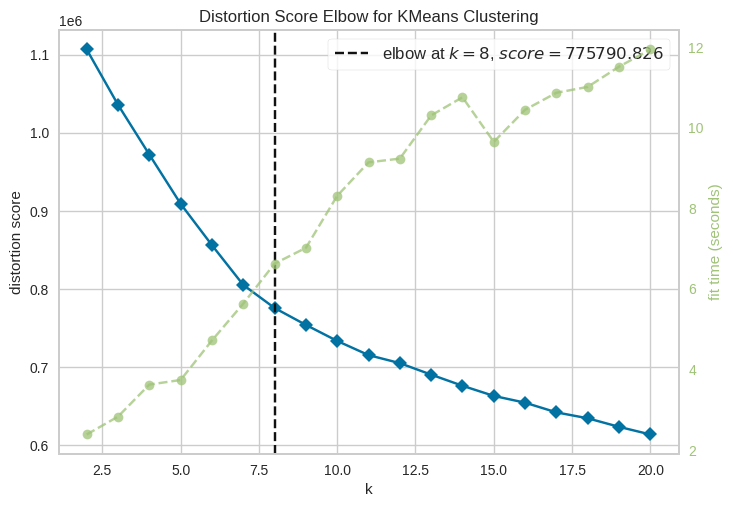

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
# Now, we can perform clustering on the above data
# Visualize performance of KMeans at various values k
# This approaches uses distortion score to evaluate KMeans
model1 = KMeans()
visualizer = KElbowVisualizer(model1, k=(2, 21))

visualizer.fit(df_scaled)   
visualizer.show()

The KElbowVisualizer is a valid tool for choosing the optimal value of k for K-means clustering based on the elbow method. from the previous graph, the optimal value of k for K-means clustering based on the elbow method is 8.

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 2, Silhouette Score: 0.149, Change from Previous Cluster: 0.0


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 3, Silhouette Score: 0.137, Change from Previous Cluster: -0.012


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 4, Silhouette Score: 0.116, Change from Previous Cluster: -0.021


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 5, Silhouette Score: 0.127, Change from Previous Cluster: 0.011


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 6, Silhouette Score: 0.135, Change from Previous Cluster: 0.008


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 7, Silhouette Score: 0.139, Change from Previous Cluster: 0.004


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 8, Silhouette Score: 0.14, Change from Previous Cluster: 0.001


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 9, Silhouette Score: 0.132, Change from Previous Cluster: -0.008


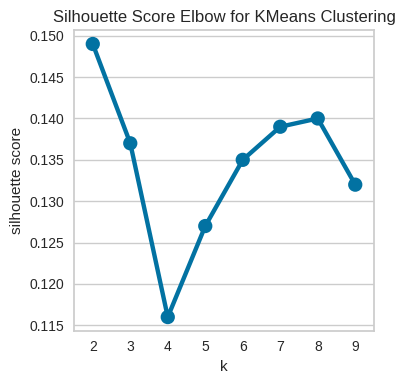

In [42]:
# Evaluate KMeans at various values k, Silhouette score is open used
# Define a function to test KMeans at various k
# This approach uses silhouette score to evaluate KMeans
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values and line plot of Silhouette Score.
    '''
    
    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, 
                                                random_state=1), 3)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)

        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters, 
            silhouette_avg, 
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(4,4))

            plt.title('Silhouette Score Elbow for KMeans Clustering')
            plt.xlabel('k')
            plt.ylabel('silhouette score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.savefig('silhouette_score.png', format='png', dpi=300,
                        pad_inches=2.0)
            plt.tight_layout()
            plt.show()
            
optimal_kmeans(df_scaled, 2, 10) 

We see that the silhouette score is maximized at k = 2. So, we will take 22 clusters.
The Silhouette score may be a better choice because it can capture the separation and compactness of the clusters. 


So, let's try when K=2.

In [43]:
# Determine the best value of K
k = 2  # This is the value of K that was determined to be the best

# Re-fit the KMeans model
model1 = KMeans(n_clusters=k, random_state=42)
model1.fit(df_scaled)

# Predict the cluster of each row
labels1 = model1.predict(df_scaled)

# Print the labels
print(labels1)


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

[1 0 0 ... 1 1 1]


To plot we need reduce the dimensionality

In [45]:
tsne= TSNE(n_components=2, random_state=42)
df_tsne= tsne.fit_transform(df_scaled)

<Figure size 800x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'K-means Clustering with K=2')

Text(0.5, 0, 't-SNE Component 1')

Text(0, 0.5, 't-SNE Component 2')

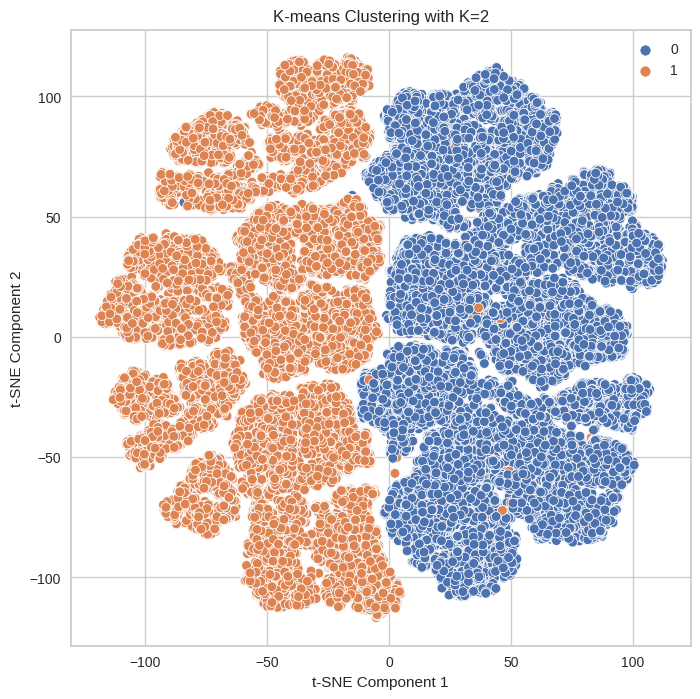

In [46]:
# Visualize the resulting clusters using a scatter plot
plt.figure(figsize=(8, 8))
sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1], hue=labels1, palette='deep')
plt.title('K-means Clustering with K=2')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

Based on the pervious graph, We can see that the data points are divided into 2 distinct cluster, . There is some few overlap between groups,Overall the resulting clusters were found to be of good quality and provided insights into the spending behavior of the users in the dataset.

Q2 (5 points) Based on your results from Q1, report the statistics of loyalty
scores for each cluster of users. Report your findings.

In [48]:
cluster_df = pd.DataFrame(NEW_df, columns=NEW_df.columns)
cluster_df['cluster'] = labels1
cluster_stats = cluster_df.groupby('cluster').agg(['mean', 'median','std'])
cluster_stats

card_id                         installments_sum          
                  mean    median           std             mean median   
cluster                                                                  
0        101103.649251  101056.0  58303.311046       123.022044   85.0  \
1        101295.294176  101522.0  58313.125528         2.182207    0.0   

                    installments_mean                     purchase_date_count   
                std              mean    median       std                mean   
cluster                                                                         
0        127.677485          1.634149  1.345124  1.151010           87.994884  \
1          5.237482          0.028402  0.000000  0.089508          111.235556   

         ... feature_1 feature_2                  feature_3                    
         ...       std      mean median       std      mean median       std   
cluster  ...                                                                   
0        ...  1.183903  1.746443    2.0  0.750702  0.562272    1.0  0.496112  \
1        ...  1.189174  1.743421    2.0  0.751355  0.568172    1.0  0.495336   

            score                      
             mean    median       std  
cluster                                
0       -0.401159 -0.024116  3.886098  
1       -0.398579 -0.030739  3.820623  

[2 rows x 42 columns]

Looking at the cluster_stats DataFrame, we can see that each cluster has a different mean, median, and standard deviation for the card_id column. The statistics for each cluster as an example :
Standard Deviation = 3.495237
* Cluster 0: Mean  = -0.401159, Median = -0.024116, Standard deviation  = 3.886098
* Cluster 1: Mean = -0.398579, Median  = -0.030739, Standard deviation = 3.820623

It appears that the loyalty scores are quite similar between the two clusters. The mean and median loyalty scores are both slightly higher (closer to 0) for Cluster 1 compared to Cluster 0. The standard deviation of loyalty scores is also slightly lower for Cluster 1, indicating that the scores are somewhat more closely distributed around the mean in this cluster.

In [49]:
# Calculate the centroid of each cluster
centroids = model1.cluster_centers_

# Print the centroid of each cluster
for i in range(k):
    print(f'Centroid of cluster {i}: {centroids[i]}')

Centroid of cluster 0: [-0.00156789  0.51836779  0.65707258 -0.09906483  0.06443259  0.14778163
 -0.09767735  0.4064402   0.91292546 -0.00133338 -0.00507423  0.00188917
 -0.0056565 ]
Centroid of cluster 1: [ 0.00173801 -0.57461256 -0.72836732  0.10981372 -0.07142376 -0.16381647
  0.1082757  -0.45054042 -1.01198116  0.00147806  0.00562481 -0.00209415
  0.00627025]


Text(0.5, 1.0, 't-SNE plot of clustered data')

Text(0.5, 0, 't-SNE dimension 1')

Text(0, 0.5, 't-SNE dimension 2')

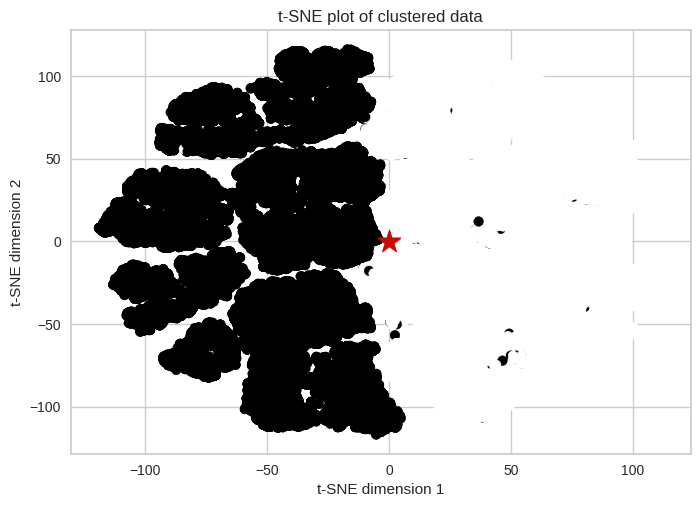

In [50]:
# Visualize clusters
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=labels1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
plt.title('t-SNE plot of clustered data')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.show()

there are some overlapping

2. let's try refit model when K=8 

In [61]:
# Determine the best value of K
k = 8  # This is the value of K that was determined to be the best

# Re-fit the KMeans model
model2 = KMeans(n_clusters=k, random_state=42)
model2.fit(df_scaled)

# Predict the cluster of each row
labels1 = model2.predict(df_scaled)

# Print the labels
print(labels1)


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=42)

[0 4 4 ... 0 4 0]


<Figure size 800x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'K-means Clustering with K=8')

Text(0.5, 0, 't-SNE Component 1')

Text(0, 0.5, 't-SNE Component 2')

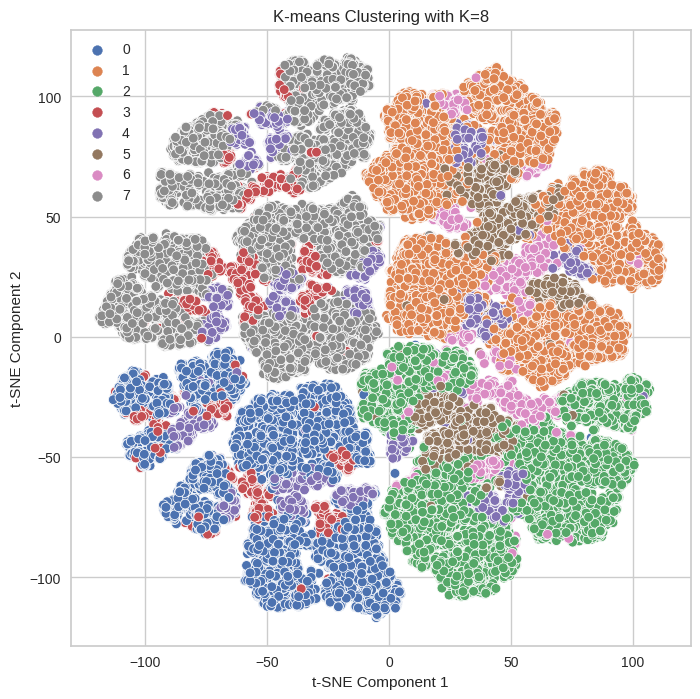

In [62]:
# Visualize the resulting clusters using a scatter plot
plt.figure(figsize=(8, 8))
sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1], hue=labels1, palette='deep')
plt.title('K-means Clustering with K=8')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

The pervious trail when k=2 is better than this trail.
there are many overlapping.

Q3 (30 points) Discuss whether you need to reduce the dimensions to
improve clustering performance and build another clustering model (if
you believe dimension reduction would help, you can apply it or choose
another clustering method) to improve your analysis from Q1. You should
explain why the resultant clusters are better than the ones you got in Q1.

Thera are two way to reduce the dimensionality:

    1. The t-SNE algorithm is used to reduce the dimensionality of the feature space to two dimensions, which can be helpful for visualization purposes.
    
    2. the PCA is a statistical technique used to reduce the dimensionality of a dataset by identifying patterns and relationships between variables.

# Secound trail (Using t-SNE algorithm)

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: F

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=20), k=(2, 21))

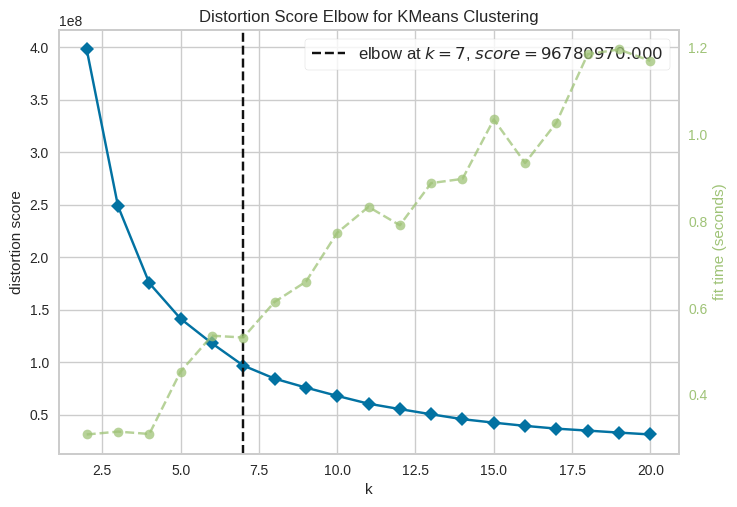

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [66]:
# Now, we can perform clustering on the above data
# Visualize performance of KMeans at various values k
# This approaches uses distortion score to evaluate KMeans
# we applied the t-SNE on the data in the pervious steps (when we plotted the clusters)
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 21))

visualizer.fit(df_tsne)   
visualizer.show()

The KElbowVisualizer is a valid tool for choosing the optimal value of k for K-means clustering based on the elbow method. from the previous graph, the optimal value of k for K-means clustering based on the elbow method is 7.

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 2, Silhouette Score: 0.3479999899864197, Change from Previous Cluster: 0.0


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 3, Silhouette Score: 0.3779999911785126, Change from Previous Cluster: 0.029999999329447746


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 4, Silhouette Score: 0.37400001287460327, Change from Previous Cluster: -0.004000000189989805


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 5, Silhouette Score: 0.3540000021457672, Change from Previous Cluster: -0.019999999552965164


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 6, Silhouette Score: 0.37400001287460327, Change from Previous Cluster: 0.019999999552965164


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 7, Silhouette Score: 0.3779999911785126, Change from Previous Cluster: 0.004000000189989805


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 8, Silhouette Score: 0.36800000071525574, Change from Previous Cluster: -0.009999999776482582


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 9, Silhouette Score: 0.35499998927116394, Change from Previous Cluster: -0.013000000268220901


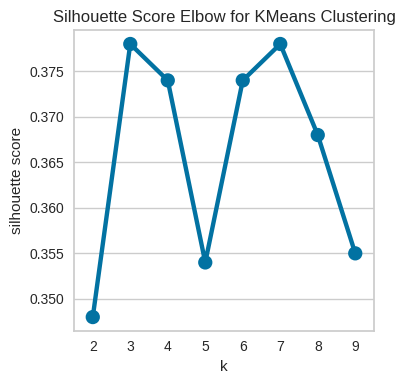

In [67]:
# Evaluate KMeans at various values k, Silhouette score is open used
# Define a function to test KMeans at various k
# This approach uses silhouette score to evaluate KMeans
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values and line plot of Silhouette Score.
    '''
    
    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, 
                                                random_state=1), 3)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)

        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters, 
            silhouette_avg, 
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(4,4))

            plt.title('Silhouette Score Elbow for KMeans Clustering')
            plt.xlabel('k')
            plt.ylabel('silhouette score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.savefig('silhouette_score.png', format='png', dpi=300,
                        pad_inches=2.0)
            plt.tight_layout()
            plt.show()
            
optimal_kmeans(df_tsne, 2, 10) 

We see that the silhouette score is maximized at k = 7 and K=3. and the optimal value of k for K-means clustering based on the elbow method is 7 So, we will take 7 clusters.



In [68]:
# Determine the best value of K
k = 7  # This is the value of K that was determined to be the best

# Re-fit the KMeans model
model = KMeans(n_clusters=k, random_state=42)
model.fit(df_tsne)

# Predict the cluster of each row
labels2 = model.predict(df_tsne)

# Print the labels
print(labels2)


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=42)

[0 5 2 ... 0 0 0]


<Figure size 800x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'K-means Clustering with K=6')

Text(0.5, 0, 't-SNE Component 1')

Text(0, 0.5, 't-SNE Component 2')

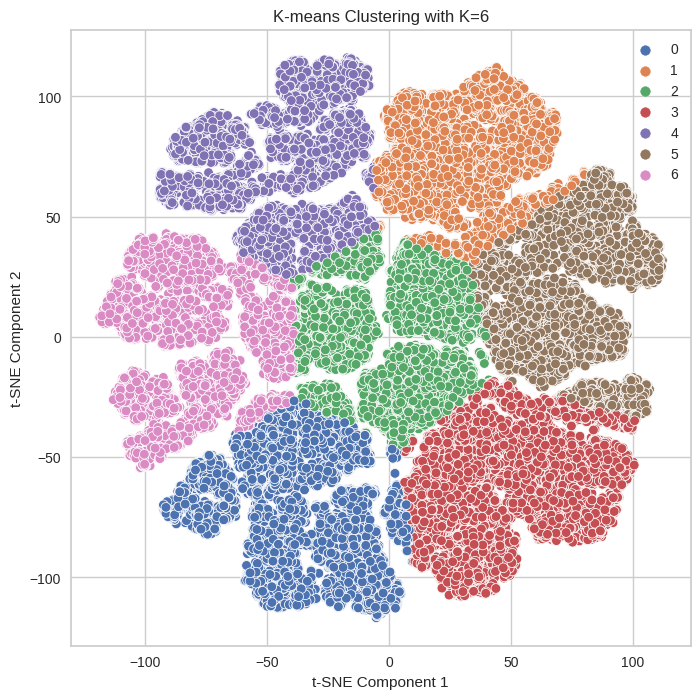

In [69]:
# Visualize the resulting clusters using a scatter plot
plt.figure(figsize=(8, 8))
sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1], hue=labels2, palette='deep')
plt.title('K-means Clustering with K=6')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

Based on the pervious graph, We can see that the data points are divided into 7 distinct groups, with each group clearly seen as a group of data points with similar colors. There is some few overlap between groups (0, 1and 1, 5) , We can also notice that there is some structure to the data points within each group, with some groups appearing tighter than others. For example, clusters 1, 3, 5  appear tightly clustered, while clusters 0, 2, 4,6 appear more diffuse.
but,Overall the resulting clusters were found to be of good quality and provided insights into the spending behavior of the users in the dataset.

This trail seems better than before using dimensionality reduction

In [72]:
cluster_df = pd.DataFrame(NEW_df, columns=NEW_df.columns)
cluster_df['cluster'] = labels2
cluster_stats = cluster_df.groupby('cluster').agg(['mean', 'median','std'])
cluster_stats

card_id                         installments_sum          
                  mean    median           std             mean median   
cluster                                                                  
0        105361.658005  107557.0  58263.572230         6.605104    1.0  \
1        102315.789331  103138.0  58533.302069       113.661269   80.0   
2        102469.664570  103711.0  58210.239510        69.520390   40.0   
3         98227.008049   96312.0  57964.699698       129.132219   87.0   
4         99707.260727   98932.5  58338.711261         2.508173    0.0   
5        101640.204598  101695.0  58346.191427       133.292484   90.0   
6         98794.995712   97105.0  58260.632121         2.115706    0.0   

                    installments_mean                     purchase_date_count   
                std              mean    median       std                mean   
cluster                                                                         
0         24.505254          0.100392  0.003697  0.349345          112.122771  \
1        109.416181          1.697855  1.366346  0.963546           80.202449   
2        114.767854          1.040394  1.084746  1.817196           84.156759   
3        134.383570          1.639249  1.346939  0.860373           93.560334   
4          7.063649          0.039575  0.000000  0.164737          104.492265   
5        134.271082          1.557944  1.326797  0.677210           98.322014   
6          4.598850          0.023819  0.000000  0.061986          118.971510   

         ... feature_1 feature_2                  feature_3                    
         ...       std      mean median       std      mean median       std   
cluster  ...                                                                   
0        ...  0.426080  1.615181    1.0  0.728949  0.000000    0.0  0.000000  \
1        ...  0.712850  1.440079    1.0  0.505117  0.999836    1.0  0.012821   
2        ...  0.581546  1.820991    2.0  0.523049  0.620207    1.0  0.485352   
3        ...  0.496304  1.612190    2.0  0.626606  0.001290    0.0  0.035898   
4        ...  0.908355  1.276051    1.0  0.447059  1.000000    1.0  0.000000   
5        ...  0.391218  2.139211    3.0  0.954689  0.909091    1.0  0.287490   
6        ...  0.563738  2.292027    2.0  0.764768  0.619013    1.0  0.485647   

            score                      
             mean    median       std  
cluster                                
0       -0.342635 -0.005183  3.635534  
1       -0.492378 -0.072123  4.123217  
2       -0.303573 -0.031242  3.495237  
3       -0.395617  0.000000  3.900040  
4       -0.410157 -0.048409  3.826752  
5       -0.414459 -0.037207  3.995936  
6       -0.464494 -0.035021  4.032681  

[7 rows x 42 columns]

Looking at the cluster_stats DataFrame, we can see that each cluster has a different mean, median, and standard deviation for the card_id column. The statistics for each cluster as an example :
Standard Deviation = 3.495237
* Cluster 0 (lowest scores): Mean  = -0.342635, Median = -0.005183, Standard deviation  = 3.635534
* Cluster 1: Mean = -0.492378, Median  = -0.072123, Standard deviation = 4.123217
* Cluster 2: Mean  = -0.303573, Median  = -0.031242, Standard deviation  = 3.495237

The loyalty scores are lowest (most loyal) for clusters 0 and 6, and highest (least loyal) for clusters 1, 2 and 3. Cluster 5 also has relatively high loyalty scores. The standard deviations are fairly consistent across clusters, ranging from 3.5 to 4.1.

In [73]:
# Calculate the centroid of each cluster
centroids = model.cluster_centers_

# Print the centroid of each cluster
for i in range(k):
    print(f'Centroid of cluster {i}: {centroids[i]}')

Centroid of cluster 0: [-35.877014 -71.879616]
Centroid of cluster 1: [31.063526 73.15835 ]
Centroid of cluster 2: [0.77336687 0.13843904]
Centroid of cluster 3: [ 49.237263 -61.72299 ]
Centroid of cluster 4: [-43.056313  70.23101 ]
Centroid of cluster 5: [74.324234 17.582056]
Centroid of cluster 6: [-78.78664    -1.8259764]


We can interpret the centroid coordinates as the average values of the two features for each cluster. For example, cluster 0 has a centroid of [-35.877014 -71.879616], which suggests that this cluster has a relatively high value for both features compared to the other clusters.


Text(0.5, 1.0, 't-SNE plot of clustered data')

Text(0.5, 0, 't-SNE dimension 1')

Text(0, 0.5, 't-SNE dimension 2')

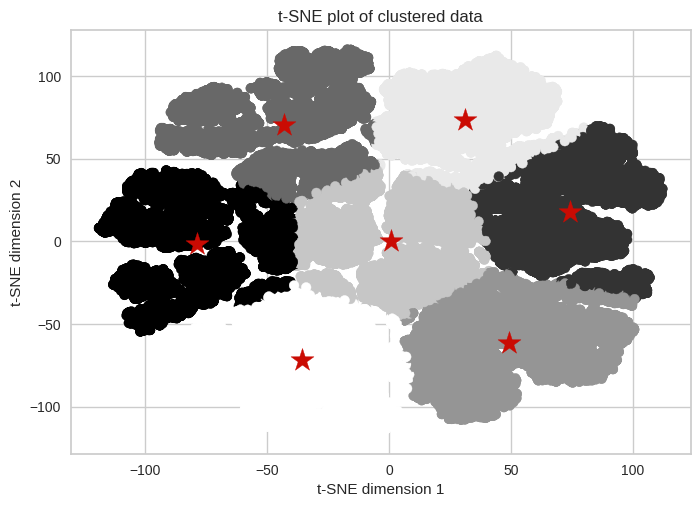

In [74]:
# Visualize clusters
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=labels2)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
plt.title('t-SNE plot of clustered data')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.show()

Based on the pervious graph, it seems the good cluster when k = 7.


# The Third Trail (PCA)

In [75]:
# Split the data into train and test sets
X = New_df.drop(['score'], axis=1)
y = New_df['score']

<Axes: xlabel='PC1', ylabel='PC2'>

Text(0.5, 1.0, 'PCA plot of aggregated data')

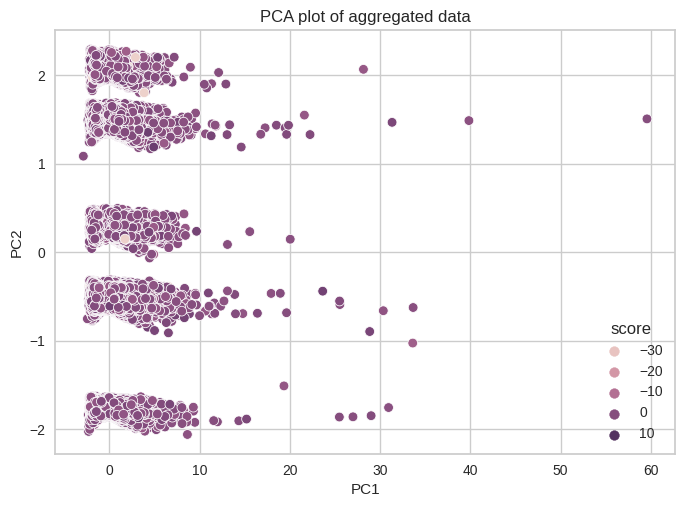

In [86]:
from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with the PCA results
columns = ['PC{}'.format(i+1) for i in range(pca.n_components_)]
pca_df = pd.DataFrame(X_pca, columns=columns)
pca_df['score'] = y

# Plot the results
import seaborn as sns
sns.scatterplot(x='PC1', y='PC2', hue='score', data=pca_df)
plt.title('PCA plot of aggregated data')
plt.show()

In [87]:
pca_df.head(10)

,PC1,PC2,score
0,1.134752,-1.863624,0.134077
1,1.658039,1.439349,0.884295
2,-1.602881,0.193621,-0.264433
3,-1.590070,-0.633777,0.812872
4,1.736078,-0.576773,1.288514
5,-1.556784,1.602938,-0.083268
6,1.036698,1.360128,-1.264398
7,-1.531177,1.495200,0.512450
8,-1.384406,-0.618293,2.070528
9,-1.658268,-1.804268,-0.537806


In [88]:
# Randomly sample 100,000 rows from the dataset
df2 = pca_df.sample(n=100000, random_state=42)

In [89]:
# TO AVOID OVERFITTING
df_2=df2.drop(['score'], axis=1)

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: F

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=20), k=(2, 21))

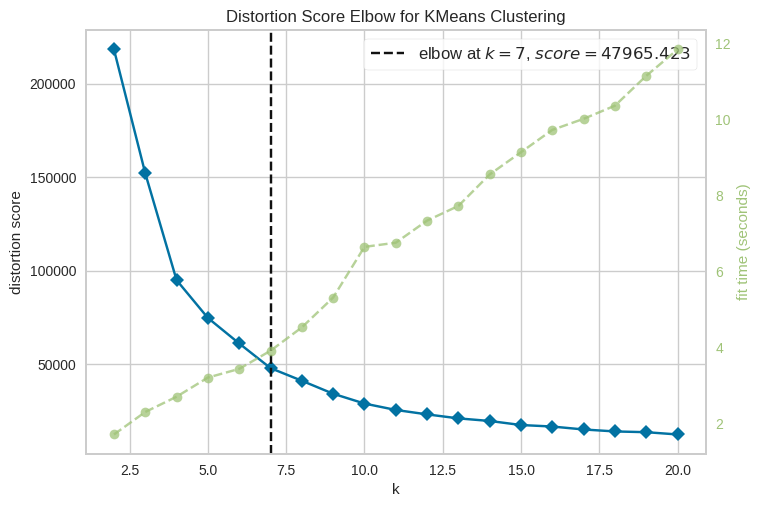

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [91]:
# Now, we can perform clustering on the above data
# Visualize performance of KMeans at various values k
# This approaches uses distortion score to evaluate KMeans
model3 = KMeans()
visualizer = KElbowVisualizer(model3, k=(2, 21))

visualizer.fit(df_2)   
visualizer.show()

The KElbowVisualizer is a valid tool for choosing the optimal value of k for K-means clustering based on the elbow method. from the previous graph, the optimal value of k for K-means clustering based on the elbow method is 7.

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 2, Silhouette Score: 0.462, Change from Previous Cluster: 0.0


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 3, Silhouette Score: 0.469, Change from Previous Cluster: 0.007


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 4, Silhouette Score: 0.542, Change from Previous Cluster: 0.073


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 5, Silhouette Score: 0.542, Change from Previous Cluster: 0.0


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 6, Silhouette Score: 0.568, Change from Previous Cluster: 0.026


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 7, Silhouette Score: 0.593, Change from Previous Cluster: 0.025


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 8, Silhouette Score: 0.598, Change from Previous Cluster: 0.005


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No. Clusters: 9, Silhouette Score: 0.593, Change from Previous Cluster: -0.005


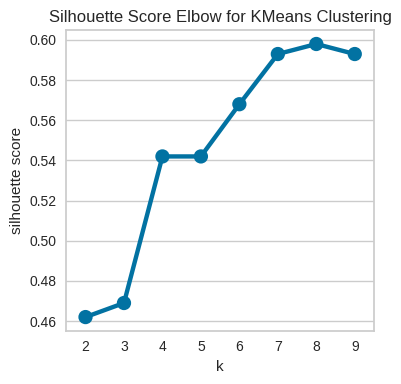

In [97]:
# Evaluate KMeans at various values k, Silhouette score is open used
# Define a function to test KMeans at various k
# This approach uses silhouette score to evaluate KMeans
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values and line plot of Silhouette Score.
    '''
    
    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, 
                                                random_state=1), 3)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)

        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters, 
            silhouette_avg, 
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(4,4))

            plt.title('Silhouette Score Elbow for KMeans Clustering')
            plt.xlabel('k')
            plt.ylabel('silhouette score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.savefig('silhouette_score.png', format='png', dpi=300,
                        pad_inches=2.0)
            plt.tight_layout()
            plt.show()
            
optimal_kmeans(df_2, 2, 10) 

We see that the silhouette score is maximized at k = 8. So, we will take 5 clusters.
he Silhouette score may be a better choice because it can capture the separation and compactness of the clusters. 
SO, I will K=8

In [98]:
# Determine the best value of K
k = 8  # This is the value of K that was determined to be the best

# Re-fit the KMeans model
model3 = KMeans(n_clusters=k, random_state=42)
model3.fit(df_2)

# Predict the cluster of each row
labels4 = model3.predict(df_2)

# Print the labels
print(labels4)


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=42)

[0 1 4 ... 0 0 0]


In [95]:
df_2=np.array(df_2)

<Figure size 800x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'K-means Clustering with K=8')

Text(0.5, 0, 'PCA Component 1')

Text(0, 0.5, 'PCA Component 2')

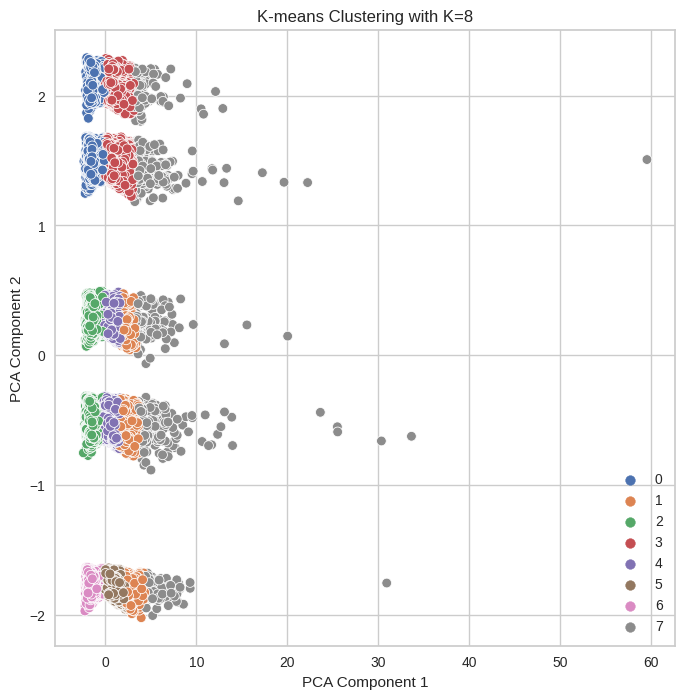

In [103]:
# Visualize the resulting clusters using a scatter plot
plt.figure(figsize=(8, 8))
sns.scatterplot(x=df_2[:, 0], y=df_2[:, 1], hue=labels4, palette='deep')
plt.title('K-means Clustering with K=8')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

Based on the pervious graph, We can see that the data points are divided into 8 distinct clusters, with each cluster clearly seen as a group of data points with similar colors. There is some few overlap between groups , We can also notice that there is some structure to the data points within each cluster, with some groups appearing tighter than others. For example, clusters 0,1,2 appear tightly clustered, while clusters  7 appear more diffuse.
but,Overall the resulting clusters were found to be of good quality and provided insights into the spending behavior of the users in the dataset.

In [100]:
cluster_df = pd.DataFrame(NEW_df, columns=NEW_df.columns)
cluster_df['cluster'] = labels4
cluster_stats = cluster_df.groupby('cluster').agg(['mean', 'median','std'])
cluster_stats

card_id                         installments_sum          
                  mean    median           std             mean median   
cluster                                                                  
0        101661.312508  101601.5  58660.547818         2.519865    0.0  \
1        101489.159103  101020.5  58357.165854       166.146905   98.5   
2        101389.269986  101698.5  58027.608436         2.118776    0.0   
3        100699.314906  100536.0  57918.400666       116.940105   84.0   
4        100841.445529  100564.0  58656.024885       103.627807   80.0   
5        101942.876521  102940.0  58319.838395       112.339345   82.0   
6        100451.269545  100916.0  58340.611203         2.248007    0.0   
7        101845.101526  101771.0  58414.227461       264.690776  135.0   

                    installments_mean                     purchase_date_count   
                std              mean    median       std                mean   
cluster                                                                         
0          6.851733          0.037832  0.000000  0.132751          110.170447  \
1        176.451480          2.165859  2.000000  0.948919          104.568861   
2          4.915928          0.027240  0.000000  0.087635          111.566286   
3        108.116730          1.521204  1.330097  0.583433           86.802341   
4         81.801413          1.350126  1.255435  0.352784           82.315971   
5         99.324240          1.425261  1.296296  0.443392           86.524231   
6          5.231083          0.029732  0.000000  0.098002          111.539712   
7        329.413155          4.741164  4.125000  4.782125           95.244857   

         ... feature_1 feature_2                  feature_3                    
         ...       std      mean median       std      mean median       std   
cluster  ...                                                                   
0        ...  0.384802  1.678343    2.0  0.706106  0.000000    0.0  0.000000  \
1        ...  0.773181  1.849554    2.0  0.791570  0.858736    1.0  0.348317   
2        ...  0.408744  1.943810    2.0  0.811733  0.787985    1.0  0.408744   
3        ...  0.379026  1.684740    2.0  0.702873  0.000000    0.0  0.000000   
4        ...  0.417673  1.941481    2.0  0.814361  0.774881    1.0  0.417673   
5        ...  0.000000  1.399314    1.0  0.489785  1.000000    1.0  0.000000   
6        ...  0.000000  1.394325    1.0  0.488731  1.000000    1.0  0.000000   
7        ...  1.035045  1.761115    2.0  0.750388  0.347047    0.0  0.476189   

            score                      
             mean    median       std  
cluster                                
0       -0.336272 -0.007333  3.617420  
1       -0.392025 -0.039344  3.785066  
2       -0.416032 -0.041262  3.875670  
3       -0.383113  0.000000  3.835141  
4       -0.359843 -0.021245  3.785116  
5       -0.527572 -0.070756  4.256550  
6       -0.477113 -0.052057  4.069585  
7       -0.272300 -0.053099  3.380311  

[8 rows x 42 columns]

The loyalty score statistics for each cluster are as follows:
Cluster 0: Mean = -0.336272, Median =-0.007333, Standard deviation = 3.617420
Cluster 1: Mean =-0.392025, Median = -0.039344, Standard deviation = 3.785066
Cluster 2: Mean = -0.416032, Median = -0.041262, Standard deviation = 3.875670
From these statistics, we can see that the mean and median loyalty scores vary across the different clusters. Cluster 7 has the highest mean loyalty score.
we can see that cluster 7 has a much higher average purchase_date_count than the other clusters, which suggests that these customers make more purchases than the others. We can also see that cluster 5 has a higher average score than the other clusters, which suggests that these customers are more loyal or valuable to the company. 

In [101]:
# Calculate the centroid of each cluster
centroids2 = model3.cluster_centers_

# Print the centroid of each cluster
for i in range(k):
    print(f'Centroid of cluster {i}: {centroids2[i]}')

Centroid of cluster 0: [-1.42336962  1.56629621]
Centroid of cluster 1: [ 2.33806904 -0.64440098]
Centroid of cluster 2: [-1.44567672 -0.34739378]
Centroid of cluster 3: [1.1930376  1.55005301]
Centroid of cluster 4: [ 0.84781454 -0.34681421]
Centroid of cluster 5: [ 1.02430828 -1.79160376]
Centroid of cluster 6: [-1.4579529  -1.78010364]
Centroid of cluster 7: [4.64559714 0.54883935]


We can interpret the centroid coordinates as the average values of the two features for each cluster. For example, cluster 0 has a centroid of[-1.42336962  1.56629621], indicating that the feature values for this cluster tend to be negative for the first feature and positive for the second feature. This could represent a group of customers who are less likely to engage with the product or service in a certain way (negative value for the first feature) but have higher usage (positive value for the second feature).


Text(0.5, 1.0, 't-SNE plot of clustered data')

Text(0.5, 0, 'PCA dimension 1')

Text(0, 0.5, 'PCA dimension 2')

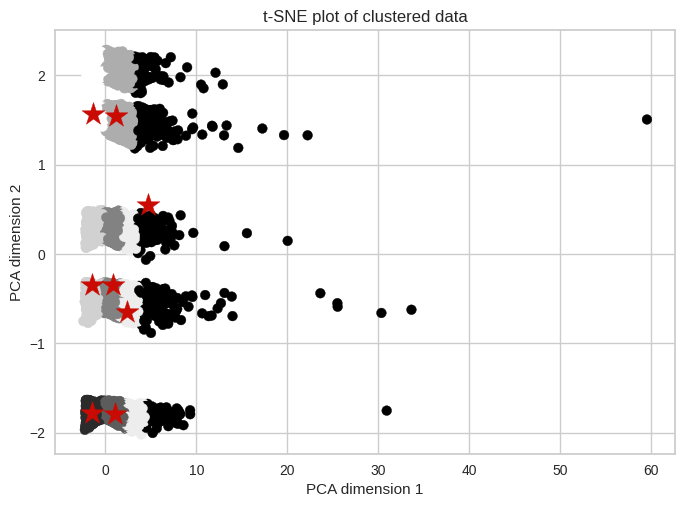

In [104]:
# Visualize clusters
plt.scatter(df_2[:, 0], df_2[:, 1], c=labels4)
plt.scatter(centroids2[:, 0], centroids2[:, 1], marker='*', s=300, c='r')
plt.title('t-SNE plot of clustered data')
plt.xlabel('PCA dimension 1')
plt.ylabel('PCA dimension 2')
plt.show()

Based on the pervious graph, it seems the good cluster when k = 8.

refit model when k =7

In [105]:
# Determine the best value of K
k = 7  # This is the value of K that was determined to be the best

# Re-fit the KMeans model
model5 = KMeans(n_clusters=k, random_state=42)
model5.fit(df_2)

# Predict the cluster of each row
labels5 = model5.predict(df_2)

# Print the labels
print(labels5)


/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=42)

[1 2 2 ... 1 1 1]


<Figure size 800x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'K-means Clustering with K=6')

Text(0.5, 0, 't-SNE Component 1')

Text(0, 0.5, 't-SNE Component 2')

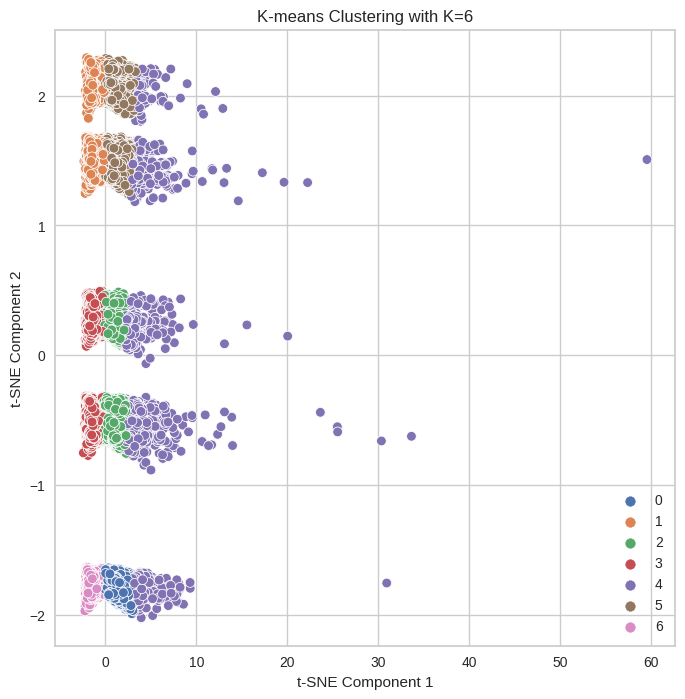

In [106]:
# Visualize the resulting clusters using a scatter plot
plt.figure(figsize=(8, 8))
sns.scatterplot(x=df_2[:, 0], y=df_2[:, 1], hue=labels5, palette='deep')
plt.title('K-means Clustering with K=6')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

the previous trial seems better than this trail.
Based on the pervious graph, We can see that the data points are divided into 7 distinct groups, with each group clearly seen as a group of data points with similar colors. There is some few overlap between groups bet, more than the pervious trail, We can also notice that there is some structure to the data points within each group, with some groups appearing tighter than others. 
but,Overall the resulting clusters were found to be of good quality and provided insights into the spending behavior of the users in the dataset.

The best k on original data was 2 and its silhouette score was 0.149 and best k on dimensionality reduction data (PCA) was 8, Silhouette Score: 0.598 and the secound best k on dimensionality reduction data (t-SNE)was 7, Silhouette Score: 0.3779999911785126.

and clustering analysis ondimensionality reduction data (PCA) was 8 is more clearly and all records classified correctly so, performing clustering analysis on dimensionality reduction data (PCA).


The time it took to cluster the data was the same in the both data so, the clustering algorithm was computationally efficient. This means that the algorithm was able to process the data and identify the clusters quickly, without requiring a significant amount of computational resources.

# Frequent Pattern Mining


Q5 (20 points) Use frequent pattern mining to find frequently co-occurring
transaction types. Report your findings and justify how you pick the min
support threshold.

We can use frequent pattern mining on the transaction dataset. One way to do this is by using the Apriori algorithm, which is implemented in both the mlxtend and spmf libraries.

I will Join userscore with df.
i don't need agrregation in the following step.


In [111]:
userscore = pd.read_csv('userscore.csv')

In [ ]:
# Join the data
hu = pd.merge(historical_transactions, userscore, on="card_id")
nu = pd.merge(new_merchant_transactions, userscore, on="card_id")

# Concatenate the two dataframes
Final_df = pd.concat([hu, nu], axis=0)

# Join merchants with the resulting dataframe
Final_df = pd.merge(Final_df, merchants, on='merchant_id')

In [ ]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19923436 entries, 0 to 19923435
Data columns (total 40 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   authorized_flag              category
 1   card_id                      category
 2   city_id_x                    int64   
 3   category_1_x                 category
 4   installments                 int64   
 5   category_3                   category
 6   merchant_category_id_x       int64   
 7   merchant_id                  category
 8   month_lag                    int64   
 9   purchase_amount              float64 
 10  purchase_date                object  
 11  category_2_x                 float64 
 12  state_id_x                   int64   
 13  subsector_id_x               int64   
 14  first_active_month           category
 15  feature_1                    int64   
 16  feature_2                    int64   
 17  feature_3                    int64   
 18  score               

In [9]:
# Standardize the data
Final_df = Final_df.astype({'authorized_flag': 'category',
                  'card_id': 'category',
                  'city_id_x': 'int64',
                  'category_1_x': 'category',
                  'installments': 'int64',
                  'category_3': 'category',
                  'merchant_category_id_x': 'int64',
                  'merchant_id': 'category',
                  'month_lag': 'int64',
                  'purchase_amount': 'float64',
                  'category_2_x': 'float64',
                  'state_id_x': 'int64',
                  'subsector_id_x': 'int64',
                  'first_active_month': 'category',
                  'feature_1': 'int64',
                  'feature_2': 'int64',
                  'feature_3': 'int64',
                  'score': 'float64',
                  'merchant_group_id': 'int64',
                  'merchant_category_id_y': 'int64',
                  'subsector_id_y': 'int64',
                  'numerical_1': 'float64',
                  'numerical_2': 'float64',
                  'category_1_y': 'category',
                  'most_recent_sales_range': 'category',
                  'most_recent_purchases_range': 'category',
                  'avg_sales_lag3': 'float64',
                  'avg_purchases_lag3': 'float64',
                  'active_months_lag3': 'int64',
                  'avg_sales_lag6': 'float64',
                  'avg_purchases_lag6': 'float64',
                  'active_months_lag6': 'int64',
                  'avg_sales_lag12': 'float64',
                  'avg_purchases_lag12': 'float64',
                  'active_months_lag12': 'int64',
                  'category_4': 'category',
                  'city_id_y': 'int64',
                  'state_id_y': 'int64',
                  'category_2_y': 'float64'})

In [11]:
features = Final_df[['first_active_month', 'most_recent_sales_range', 'most_recent_purchases_range', 'authorized_flag']]

RAMs are crashing so i will take sample from this feature

In [12]:
# Randomly sample 100,000 rows from the dataset
features = features.sample(n=100000, random_state=42)

In [13]:
# Convert transactions to list of lists
transactions = features.values.tolist()

# Convert transactions to one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
onehot_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
min_support = 0.01 # adjust as needed
frequent_itemsets = apriori(onehot_df, min_support=min_support, use_colnames=True)

# Print frequent itemsets
print(frequent_itemsets)

     support        itemsets
0    0.33134             (A)
1    0.01802        (Apr-16)
2    0.04675        (Apr-17)
3    0.03247        (Aug-16)
4    0.05610        (Aug-17)
..       ...             ...
172  0.01048  (D, Mar-17, Y)
173  0.01092  (May-17, D, Y)
174  0.01240  (Nov-16, D, Y)
175  0.01015  (Oct-17, D, Y)
176  0.01192  (D, Sep-17, Y)

[177 rows x 2 columns]


The output shows the frequent itemsets found by applying the Apriori algorithm to a dataset of transaction types represented as one-hot encoded binary values. The table contains two columns: the support and the itemsets. The support column indicates the proportion of transactions that contain the corresponding itemset, and the itemsets column lists the transaction types that occur together frequently.

1. itemset (A) has support of 0.33134, meaning 33.134% of rows in the data contain the item A.

2. Itemset (D, Mar-17, Y) has support of 0.01048, meaning 1.048% of rows contain the items D, Mar-17, and Y together.

3. The frequent itemsets show which combinations of items co-occur most often in the data, according to the minimum support threshold specified (0.01 in this case).

Lowering the minimum support would yield more itemsets, while increasing it would yield fewer, more frequent itemsets. The chosen value depends on the application and how "frequent" you want the itemsets to be.



Q6 (10 Points) Redo Q5 by splitting users based on their loyalty scores.
The goal is to explore if different frequent patterns exist in users with
high/low loyalty scores.

In [15]:
features2 = Final_df[['first_active_month', 'most_recent_sales_range', 'most_recent_purchases_range', 'authorized_flag','score']]

In [16]:
# Randomly sample 100,000 rows from the dataset
features2 = features2.sample(n=100000, random_state=42)

In [19]:
# Split users based on loyalty scores
high_loyalty = features2[features2['score'] >= features2['score'].quantile(0.75)]
low_loyalty = features2[features2['score'] < features2['score'].quantile(0.25)]

# Process high loyalty group
transactions_high = [[str(item) for item in transaction] for transaction in high_loyalty.values.tolist()]
te_high = TransactionEncoder()
te_high_ary = te_high.fit(transactions_high).transform(transactions_high)
onehot_high = pd.DataFrame(te_high_ary, columns=te_high.columns_)
frequent_itemsets_high = apriori(onehot_high, min_support=min_support, use_colnames=True)

# Process low loyalty group
transactions_low = [[str(item) for item in transaction] for transaction in low_loyalty.values.tolist()]
te_low = TransactionEncoder()
te_low_ary = te_low.fit(transactions_low).transform(transactions_low)
onehot_low = pd.DataFrame(te_low_ary, columns=te_low.columns_)
frequent_itemsets_low = apriori(onehot_low, min_support=min_support, use_colnames=True)

# Print frequent itemsets for high and low loyalty groups
print("Frequent itemsets for high loyalty group:")
print(frequent_itemsets_high)
print("\nFrequent itemsets for low loyalty group:")
print(frequent_itemsets_low)

Frequent itemsets for high loyalty group:
     support        itemsets
0    0.33008             (A)
1    0.01952        (Apr-16)
2    0.05024        (Apr-17)
3    0.03404        (Aug-16)
4    0.05596        (Aug-17)
..       ...             ...
167  0.01064  (D, Mar-17, Y)
168  0.01152  (May-17, D, Y)
169  0.01228  (Nov-16, D, Y)
170  0.01028  (Oct-17, D, Y)
171  0.01164  (Y, D, Sep-17)

[172 rows x 2 columns]

Frequent itemsets for low loyalty group:
      support        itemsets
0    0.039682  (-33.21928095)
1    0.335853             (A)
2    0.016321        (Apr-16)
3    0.044682        (Apr-17)
4    0.029761        (Aug-16)
..        ...             ...
170  0.011040  (D, Mar-17, Y)
171  0.011120  (May-17, D, Y)
172  0.011560  (Nov-16, D, Y)
173  0.010000  (Oct-17, D, Y)
174  0.010720  (Y, D, Sep-17)

[175 rows x 2 columns]


The results show the frequent itemsets for the high loyalty group and the low loyalty group separately, with each row indicating the support (frequency) of an itemset and the item(s) in that itemset.

1. For both high and low loyalty groups, (A) is a very frequent item, indicating it applies to many users in both groups.

2. The high loyalty group has some slightly more frequent itemsets containing (D, Mar-17, Y), (May-17, D, Y), (Nov-16, D, Y), etc. This could indicate certain behaviors are more common in high loyalty users.

3. The low loyalty group has an itemset (–33.21928095) that does not appear for high loyalty users. This could represent some characteristic or behavior that distinguishes low loyalty users.

4. Other than the differences noted, the frequent itemsets are fairly similar between the high and low loyalty groups. There may be more subtle patterns that could emerge with further analysis.

5. The chosen minimum support value (0.01) may be too high to detect some potentially interesting patterns that distinguish the loyalty groups. Lowering it could reveal further insights.